**STEP 1:   IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import math
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error
from time import time
from sklearn.metrics import r2_score
import os
from sklearn.model_selection import train_test_split
#Machine Learning
from sklearn.ensemble import AdaBoostRegressor

In [2]:
data = pd.read_excel('SharkTank.xlsx')
data.head

<bound method NDFrame.head of      Serial                                  Business Idea  \
0         1                                   Frozen Momos   
1         2  Renting e-bike for mobility in private spaces   
2         3                             Detachable Sleeves   
3         4                           Healthy Potato Chips   
4         5                       Brain Development Course   
..      ...                                            ...   
112     113                            Plant-Based Protein   
113     114                         Fastest Cooking Device   
114     115                                       Lemonade   
115     116                                Washroom Finder   
116     117                           Carenting for Elders   

                 Company  Deal (Final Offer)  Equity  Asheer  Peyush  Anupam  \
0    BluePine Industries                75.0   16.00       1       0       0   
1          Booz scooters                40.0   50.00       1     

In [3]:
data['Deal'] = ["0" if ele ==0 else "1" for ele in data['Deal (Final Offer)']]

In [4]:
# Copying data to another dataframe df_train for our convinience so that original dataframe remain intact.
df_train=data.copy()


In [5]:
# Now lets see the first five rows of the data
data.head(10)

,Serial,Business Idea,Company,Deal (Final Offer),Equity,Asheer,Peyush,Anupam,Ghazal,Aman,Namita,Vineeta,Deal
0,1,Frozen Momos,BluePine Industries,75.0,16.00,1,0,0,0,1,0,1,1
1,2,Renting e-bike for mobility in private spaces,Booz scooters,40.0,50.00,1,0,0,0,0,0,1,1
2,3,Detachable Sleeves,Heart up my Sleeves,25.0,30.00,0,0,1,0,0,0,1,1
3,4,Healthy Potato Chips,Tagz Foods,70.0,2.75,1,0,0,0,0,0,0,1
4,5,Brain Development Course,Head and Heart,0.0,0.00,0,0,0,0,0,0,0,0
5,6,Tourism,Agro tourism,0.0,0.00,0,0,0,0,0,0,0,0
6,7,Food Freshness Detector,Qzense Labs,0.0,0.00,0,0,0,0,0,0,0,0
7,8,Disposable Urine Bag,Peeschute,75.0,6.00,0,0,0,0,1,0,0,1
8,9,Energy Drink,NOCD,20.0,15.00,0,0,0,0,0,0,1,1
9,10,Intelligent Skincare,CosIQ,50.0,25.00,0,0,1,0,0,0,1,1


In [6]:
judges = data[['Asheer','Peyush','Anupam','Ghazal','Aman','Namita','Vineeta']]

In [7]:
factors = data[['Equity','Deal (Final Offer)']]

**STEP 2:  DATA CLEANING AND PREPROCESSING**

In [8]:
print(len(data))
# Check the number of features in the data set
print(len(data.columns))
# Check the data types of each column
print(data.dtypes)

117
13
Serial                  int64
Business Idea          object
Company                object
Deal (Final Offer)    float64
Equity                float64
Asheer                  int64
Peyush                  int64
Anupam                  int64
Ghazal                  int64
Aman                    int64
Namita                  int64
Vineeta                 int64
Deal                   object
dtype: object


In [9]:
# Check any number of columns with NaN or missing values 
print(data.isnull().any().sum(), ' / ', len(data.columns))


0  /  13


In [10]:
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  117


**STEP 3 : FINDING CORRELATION**

In [11]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation
features = data[['Deal (Final Offer)','Equity']]
target = data['Deal']

In [12]:
heat = data.corr()

<AxesSubplot:>

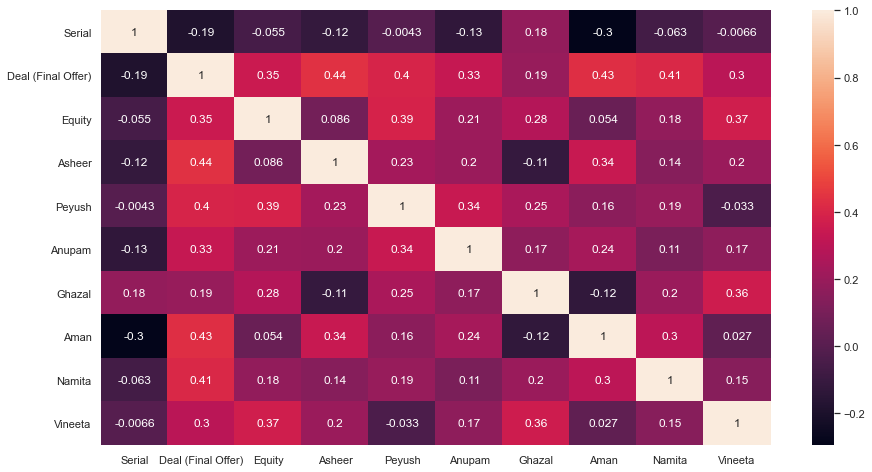

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(heat, annot=True)

**STEP 4 : EDA or DATA VISUALIZATION **

Let's explore the data

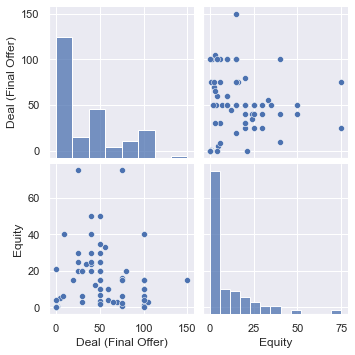

In [14]:
sns.pairplot(features)

In [28]:
data.columns

Index(['Serial', 'Business Idea', 'Company', 'Deal (Final Offer)', 'Equity',
       'Asheer', 'Peyush', 'Anupam', 'Ghazal', 'Aman', 'Namita', 'Vineeta',
       'Deal'],
      dtype='object')

In [56]:
judges = data[['Asheer', 'Peyush', 'Anupam', 'Ghazal', 'Aman', 'Namita', 'Vineeta']]

In [57]:
features.dtypes

Deal (Final Offer)    float64
Equity                float64
dtype: object

In [58]:
judges.dtypes

Asheer     int64
Peyush     int64
Anupam     int64
Ghazal     int64
Aman       int64
Namita     int64
Vineeta    int64
dtype: object

In [69]:
X = features
y = judges.Aman

**STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)

In [71]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [72]:
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)

[10:56:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [73]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
xgb_predictions_prob

array([[0.7272762 , 0.27272376],
       [0.77398974, 0.22601026],
       [0.9987087 , 0.00129129],
       [0.51012325, 0.48987672],
       [0.99899054, 0.00100944],
       [0.8928934 , 0.10710661],
       [0.9987087 , 0.00129129],
       [0.9688931 , 0.03110688],
       [0.99899054, 0.00100944],
       [0.88859606, 0.11140395],
       [0.9987087 , 0.00129129],
       [0.9987087 , 0.00129129],
       [0.12526983, 0.87473017],
       [0.9987087 , 0.00129129],
       [0.70635355, 0.29364645],
       [0.77398974, 0.22601026],
       [0.9987087 , 0.00129129],
       [0.9987087 , 0.00129129],
       [0.9987087 , 0.00129129],
       [0.9894264 , 0.01057362],
       [0.88859606, 0.11140395],
       [0.9987087 , 0.00129129],
       [0.9987087 , 0.00129129],
       [0.9898343 , 0.01016568],
       [0.9987087 , 0.00129129],
       [0.9688931 , 0.03110688],
       [0.78384924, 0.21615076],
       [0.9987087 , 0.00129129],
       [0.9987087 , 0.00129129],
       [0.8265617 , 0.1734383 ],
       [0.

In [74]:
accuracy_score(y_test, xgb_predictions)


0.6388888888888888

In [75]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier

In [105]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
r2_score(y_test,y_predict)


-2.0857142857142867

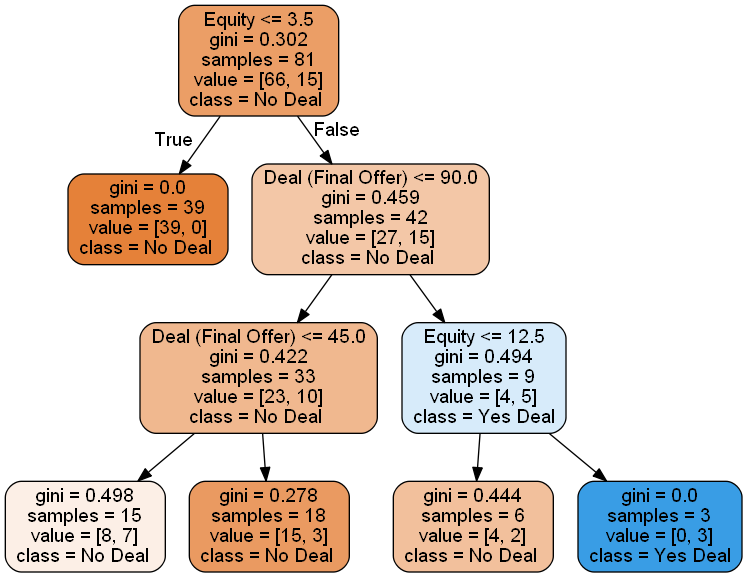

In [110]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Deal ', "Yes Deal"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


<AxesSubplot:>

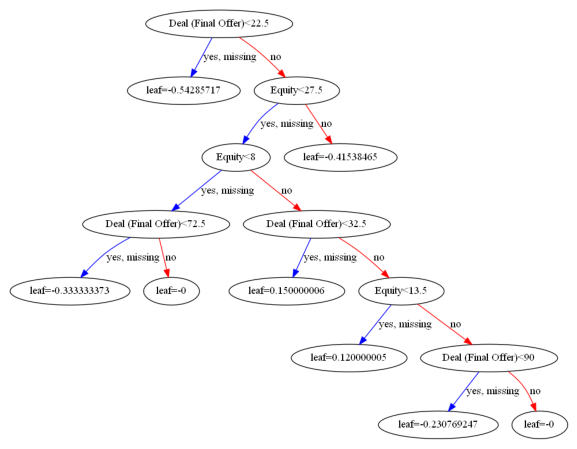

In [80]:
from xgboost import plot_tree
plot_tree(xgb_cfl)


C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

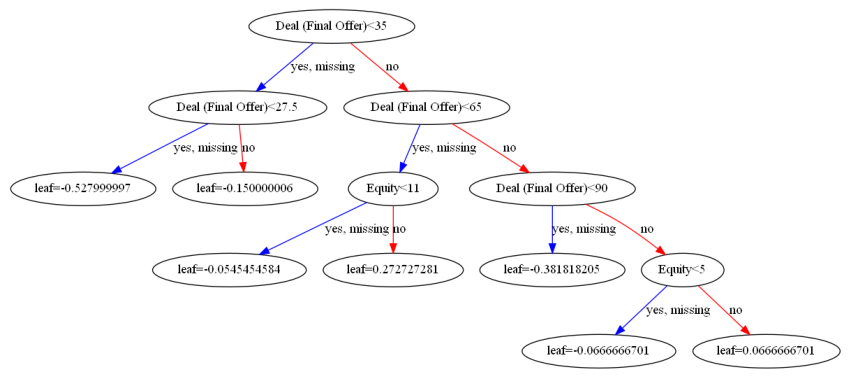

In [112]:
# Comparing Xgboost and decision trees, it looks like xgboost is more reliable and understandable hence we will move with xgboost
# Starting with Anupam 

X = features
y = judges.Anupam
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
accuracy_score(y_test, xgb_predictions)
from xgboost import plot_tree
plot_tree(xgb_cfl)




C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

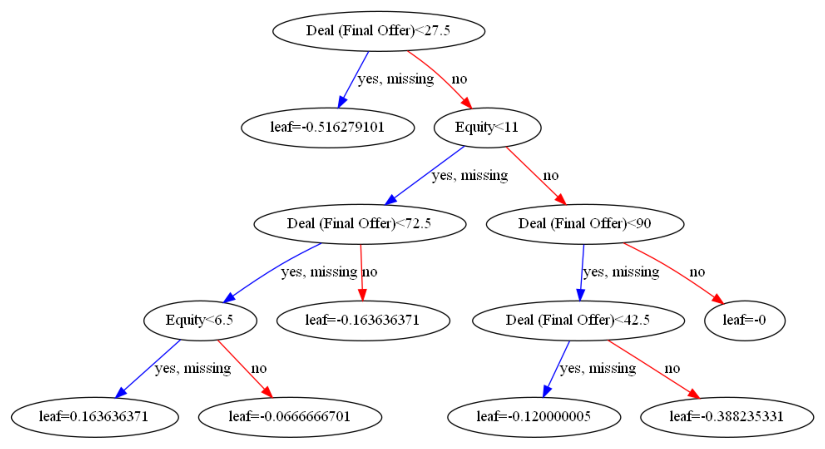

In [113]:
# Starting with Asheer 

X = features
y = judges.Asheer
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
accuracy_score(y_test, xgb_predictions)
from xgboost import plot_tree
plot_tree(xgb_cfl)



C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

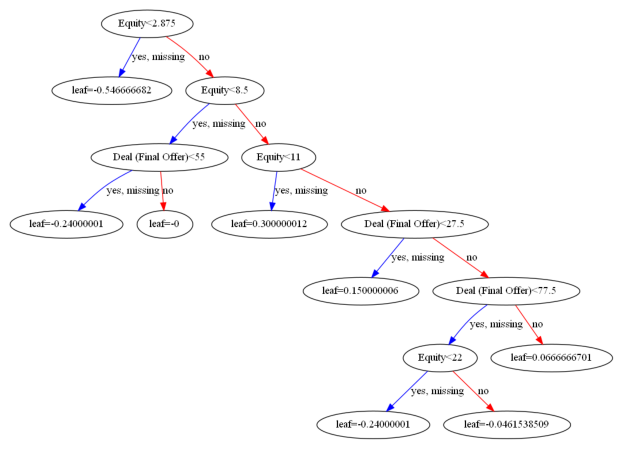

In [114]:
# Starting with Peyush 

X = features
y = judges.Peyush
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
accuracy_score(y_test, xgb_predictions)
from xgboost import plot_tree
plot_tree(xgb_cfl)



C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

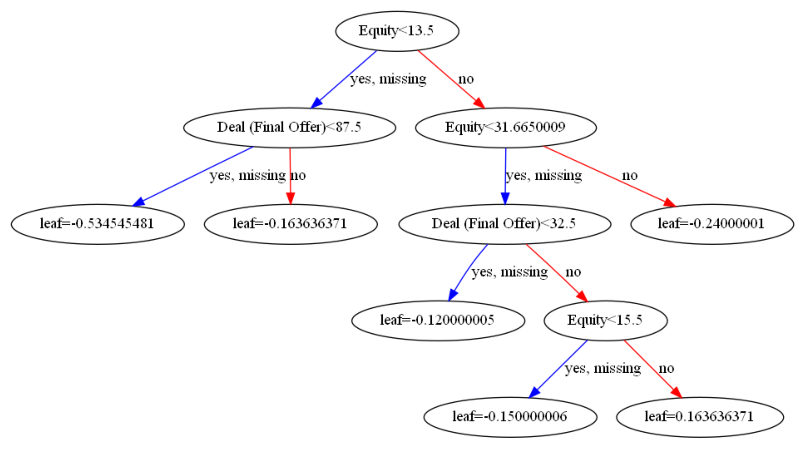

In [115]:
# Starting with  Vineeta

X = features
y = judges.Vineeta
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
accuracy_score(y_test, xgb_predictions)
from xgboost import plot_tree
plot_tree(xgb_cfl)



C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:36:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

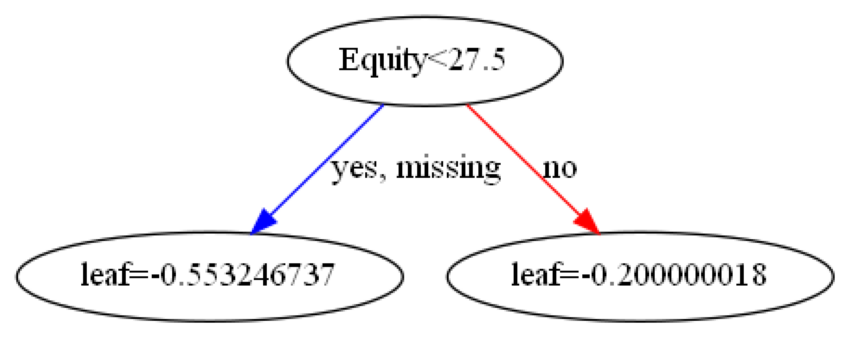

In [116]:
# Starting with Ghazal 

X = features
y = judges.Ghazal
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
accuracy_score(y_test, xgb_predictions)
from xgboost import plot_tree
plot_tree(xgb_cfl)



C:\Users\khosla\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:36:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

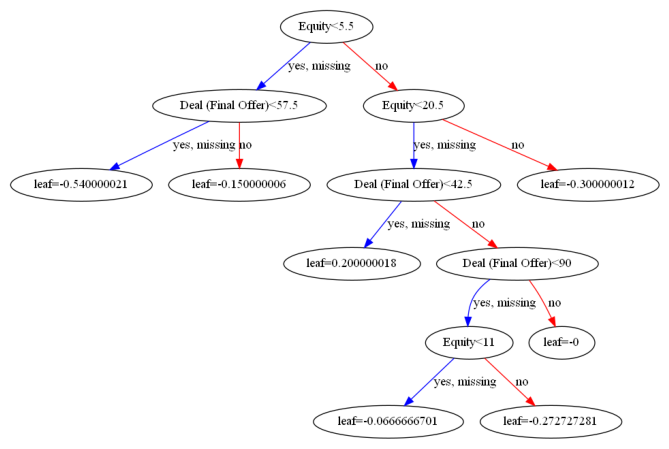

In [117]:
# Starting with Namita 

X = features
y = judges.Namita
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)
accuracy_score(y_test, xgb_predictions)
from xgboost import plot_tree
plot_tree(xgb_cfl)



### Know your sharks before you invest :) 

### Please feel free to add or subtract any code I would be happy to accept pull requests 